# Introduction

In this notebook, I'm analyzing data to try to understand how many people in the U.S. live below the poverty line.

# Data Source

## Where I got my data

My data comes from the [`Poverty estimates for the U.S., States, and counties, 2013`](http://ers.usda.gov/data-products/county-level-data-sets/download-data.aspx) dataset available from the United States Department of Agriculture. I accessed this dataset on *November 15, 2015*.

## Data format

The raw data I downloaded was a Microsoft Excel spreadsheet.

## Archiving the original data

An original copy of the data I donwloaded is called `2013poverty-data-original.xlsx`, and is in this project folder

# My Data Analysis, step-by-step

## Understanding the structure of my data

The file has two main worksheets: a worksheet with the raw data and a worksheet detailing the variable names and what they stand for.

![image showing the raw poverty dataset in Excel and its variable definitions](images/raw-poverty-data.png)

Within the raw data, each row represents a particular US county. The only exceptions are rows where state or national-level data gets aggregated.

![Data aggregated by country, state, and county](images/poverty-data-aggregations.png)



## Cleaning my data

My goal was to get my raw data into CSV format. To do that cleanly, I exported the raw data worksheet from excel, then removed the top two rows.

## Checking the data

I loaded the data into python using `read_csv()` from pandas. Then I checked the first few rows.

In [1]:
import pandas
from pandas import read_csv

poverty_data = read_csv("povertydata.csv", header = 1)
poverty_data.head()

00000  US   United States     .1  .2  .3 48,810,868 48,554,692 49,067,044  \
0   1000  AL         Alabama                   889,091    873,141    905,041   
1   1001  AL  Autauga County  2   2   2   2      7,397      6,109      8,685   
2   1003  AL  Baldwin County  4   5   3   5     27,429     23,468     31,390   
3   1005  AL  Barbour County  6   6   6   6      6,654      5,448      7,860   
4   1007  AL     Bibb County  1   1   1   1      4,689      3,803      5,575   

   ...   21.0  52,250  52,185  52,315 4,811,689 4,759,374 4,864,004  24.8  \
0  ...   26.6  42,882  42,260  43,504    92,126    87,734    96,518  31.6   
1  ...   21.6  51,868  48,314  55,422                                       
2  ...   23.2  47,539  44,089  50,989                                       
3  ...   49.2  30,981  28,134  33,828                                       
4  ...   37.6  39,781  36,433  43,129                                       

   24.5  25.1  
0  30.1  33.1  
1              
2              
3              
4              

[5 rows x 34 columns]

I realized from my initial data loading that the top row, which was supposed to be column names, was mostly numbers. That's when I figured out I made an off-by-one error, and that if I want Python to read in the first row of data it's technically row 0.

In [2]:
poverty_data = read_csv("povertydata.csv", header = 0)
poverty_data.head()

FIPStxt State       Area_Name Rural_urban_Continuum_Code_2003  \
0        0    US   United States                                   
1     1000    AL         Alabama                                   
2     1001    AL  Autauga County                               2   
3     1003    AL  Baldwin County                               4   
4     1005    AL  Barbour County                               6   

  Urban_Influence_Code_2003 Rural_urban_Continuum_Code_2013  \
0                                                             
1                                                             
2                         2                               2   
3                         5                               3   
4                         6                               6   

  Urban_Influence_Code_2013 POVALL_2013 CI90LBAll_2013 CI90UBALL_2013  \
0                            48,810,868     48,554,692     49,067,044   
1                               889,091        873,141        905,041   
2                         2       7,397          6,109          8,685   
3                         5      27,429         23,468         31,390   
4                         6       6,654          5,448          7,860   

       ...       CI90UB517P_2013 MEDHHINC_2013 CI90LBINC_2013 CI90UBINC_2013  \
0      ...                  21.0        52,250         52,185         52,315   
1      ...                  26.6        42,882         42,260         43,504   
2      ...                  21.6        51,868         48,314         55,422   
3      ...                  23.2        47,539         44,089         50,989   
4      ...                  49.2        30,981         28,134         33,828   

  POV05_2013 CI90LB05_2013 CI90UB05_2013 PCTPOV05_2013 CI90LB05P_2013  \
0  4,811,689     4,759,374     4,864,004          24.8           24.5   
1     92,126        87,734        96,518          31.6           30.1   
2                                                                       
3                                                                       
4                                                                       

  CI90UB05P_2013  
0           25.1  
1           33.1  
2                 
3                 
4                 

[5 rows x 34 columns]

## Which counties have the highest poverty estimates?

In [3]:
by_county = poverty_data[
    poverty_data["Area_Name"].apply(lambda x: x.rfind("County") >= 0)
]

by_county.sort(
    columns = ['PCTPOVALL_2013'],
    ascending = False
)[
    ['Area_Name', 'PCTPOVALL_2013']
].head(n = 20)

Area_Name PCTPOVALL_2013
704        Washington County            9.9
2052         McKenzie County            9.9
2759           Reagan County            9.9
798            Warren County            9.9
291           Mineral County            9.9
1699         Cheyenne County            9.9
3160      Trempealeau County            9.9
1719           Gosper County            9.9
1728           Hooker County            9.9
571            Blaine County            9.9
1688            Boone County            9.9
1230  Prince George's County            9.9
3194           Weston County            9.9
1921      Westchester County            9.9
340              Clay County            9.9
1803        Strafford County            9.8
855            Jasper County            9.8
2414         Campbell County            9.8
860           Kossuth County            9.8
297             Ouray County            9.8

In [4]:
import matplotlib
import numpy as np
from IPython.display import set_matplotlib_formats

# Set up matplotlib
set_matplotlib_formats('pdf', 'svg')
%matplotlib inline
matplotlib.style.use('ggplot')
plt = matplotlib.pyplot

In [5]:
plt.figure()

# this code produces an error
# by_county['PCTPOVALL_2013'].plot(
#     kind = 'hist'
# )

When I first tried to plot this data, I got this error:

> `TypeError: Empty 'DataFrame': no numeric data to plot`

So I decided to check my data types

In [6]:
by_county.dtypes

FIPStxt                             int64
State                              object
Area_Name                          object
Rural_urban_Continuum_Code_2003    object
Urban_Influence_Code_2003          object
Rural_urban_Continuum_Code_2013    object
Urban_Influence_Code_2013          object
POVALL_2013                        object
CI90LBAll_2013                     object
CI90UBALL_2013                     object
PCTPOVALL_2013                     object
CI90LBALLP_2013                    object
CI90UBALLP_2013                    object
POV017_2013                        object
CI90LB017_2013                     object
CI90UB017_2013                     object
PCTPOV017_2013                     object
CI90LB017P_2013                    object
CI90UB017P_2013                    object
POV517_2013                        object
CI90LB517_2013                     object
CI90UB517_2013                     object
PCTPOV517_2013                     object
CI90LB517P_2013                   

Hmm, it looks like based on the way the data got imported, Python isn't recognizing the PCT poverty overall as a floating point. I wonder what all the distinct types of values are the Python is seeing for that column.

In [7]:
set(by_county['PCTPOVALL_2013'])

{' ',
 '10.0',
 '10.1',
 '10.2',
 '10.3',
 '10.4',
 '10.5',
 '10.6',
 '10.7',
 '10.8',
 '10.9',
 '11.0',
 '11.1',
 '11.2',
 '11.3',
 '11.4',
 '11.5',
 '11.6',
 '11.7',
 '11.8',
 '11.9',
 '12.0',
 '12.1',
 '12.2',
 '12.3',
 '12.4',
 '12.5',
 '12.6',
 '12.7',
 '12.8',
 '12.9',
 '13.0',
 '13.1',
 '13.2',
 '13.3',
 '13.4',
 '13.5',
 '13.6',
 '13.7',
 '13.8',
 '13.9',
 '14.0',
 '14.1',
 '14.2',
 '14.3',
 '14.4',
 '14.5',
 '14.6',
 '14.7',
 '14.8',
 '14.9',
 '15.0',
 '15.1',
 '15.2',
 '15.3',
 '15.4',
 '15.5',
 '15.6',
 '15.7',
 '15.8',
 '15.9',
 '16.0',
 '16.1',
 '16.2',
 '16.3',
 '16.4',
 '16.5',
 '16.6',
 '16.7',
 '16.8',
 '16.9',
 '17.0',
 '17.1',
 '17.2',
 '17.3',
 '17.4',
 '17.5',
 '17.6',
 '17.7',
 '17.8',
 '17.9',
 '18.0',
 '18.1',
 '18.2',
 '18.3',
 '18.4',
 '18.5',
 '18.6',
 '18.7',
 '18.8',
 '18.9',
 '19.0',
 '19.1',
 '19.2',
 '19.3',
 '19.4',
 '19.5',
 '19.6',
 '19.7',
 '19.8',
 '19.9',
 '20.0',
 '20.1',
 '20.2',
 '20.3',
 '20.4',
 '20.5',
 '20.6',
 '20.7',
 '20.8',
 '20.9',
 '21

The problem may be that top value, which is just a blank space `' '`. So, maybe I can filter that out by only choosing rows that don't include a blank space.

In [8]:
by_county_cleaned = by_county[
    by_county.PCTPOVALL_2013 != ' '
]

Now let's try that histogram again, this time forcing the data to be treated as floating point numbers.

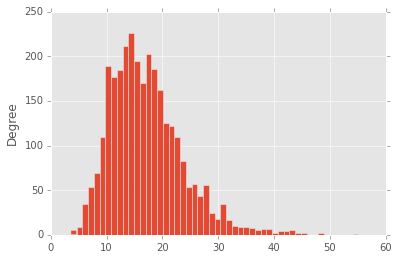

In [9]:
plt.figure()

by_county_cleaned['PCTPOVALL_2013'].astype(float).plot(
    kind = 'hist',
    bins = 50
)